In [185]:
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [186]:
data=pl.read_csv("CarPrice_Assignment.csv").drop(["car_ID","symboling","CarName"])
data.head()

fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
str,str,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64
"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,13495.0
"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,16500.0
"""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",94.5,171.2,65.5,52.4,2823,"""ohcv""","""six""",152,"""mpfi""",2.68,3.47,9.0,154,5000,19,26,16500.0
"""gas""","""std""","""four""","""sedan""","""fwd""","""front""",99.8,176.6,66.2,54.3,2337,"""ohc""","""four""",109,"""mpfi""",3.19,3.4,10.0,102,5500,24,30,13950.0
"""gas""","""std""","""four""","""sedan""","""4wd""","""front""",99.4,176.6,66.4,54.3,2824,"""ohc""","""five""",136,"""mpfi""",3.19,3.4,8.0,115,5500,18,22,17450.0


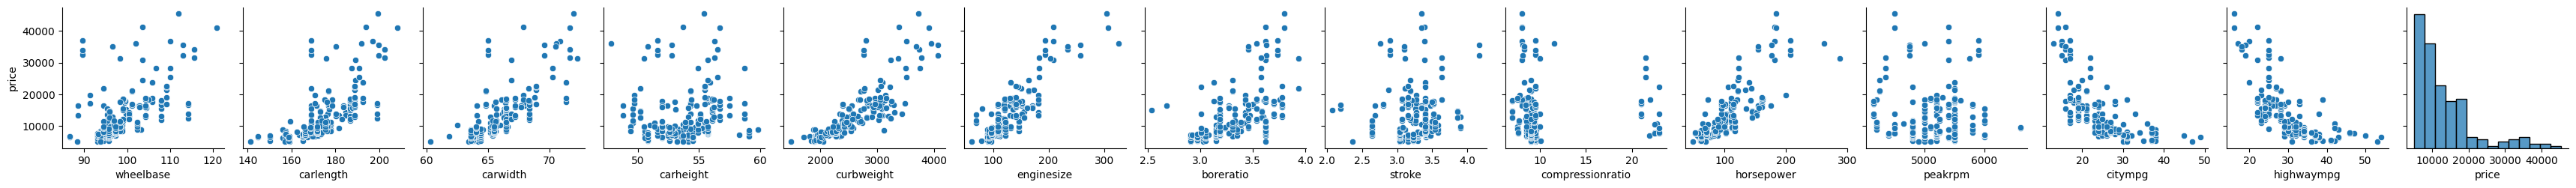

In [187]:
sns.pairplot(data.to_pandas(),y_vars=["price"])

In [188]:
cat_cols=[col for col in data.columns if data[col].dtype== pl.String]
num_cols=[col for col in data.columns if data[col].dtype!= pl.String]

In [189]:
df=data[["curbweight","price"]]
df.plot.scatter(x="price")

:Scatter   [price]   (curbweight)

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your dataframe
df = data[["curbweight", "price"]]

# Function to calculate z-scores
def compute_z_scores(data):
    return (data - np.mean(data)) / np.std(data)

# Calculate z-scores for each column
df_zscores = df.map_rows(compute_z_scores)

# Define the threshold for identifying anomalies
threshold = 3

# Identify anomalies
anomalies = (np.abs(df_zscores) > threshold).any(axis=1)

# Separate the anomalies from the normal data
df_anomalies = df[anomalies]
df_normal = df[~anomalies]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df_normal["price"], df_normal["curbweight"], color='blue', label='Normal data')
plt.scatter(df_anomalies["price"], df_anomalies["curbweight"], color='red', label='Anomalies')
plt.xlabel('Price')
plt.ylabel('Curbweight')
plt.title('Anomaly Detection using Z-scores')
plt.legend()
plt.show()

# Print anomalies
print("Anomalies detected:")

ComputeError: expected tuple, got ndarray

In [181]:
df["price"].min()

5118.0

Taking 80% of data

In [182]:
q1=df["price"].quantile(0.10)
q3=df["price"].quantile(0.90)
print(q1,q3)

6649.0 22625.0


In [183]:
df=df.filter(df["price"].is_between(q1,q3))
df.plot.scatter(x="price")

:Scatter   [price]   (curbweight)

In [184]:
q1=df["curbweight"].quantile(0.10)
q3=df["curbweight"].quantile(0.95)
print(q1,q3)
df=df.filter(df["curbweight"].is_between(q1,q3))
df.plot.scatter(x="price")

2010.0 3197.0


:Scatter   [price]   (curbweight)

In [ ]:
df["curbweight"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              2422.
Date:                Sun, 19 May 2024   Prob (F-statistic):                   3.85e-100
Time:                        10:56:51   Log-Likelihood:                         -1562.9
No. Observations:                 165   AIC:                                      3128.
Df Residuals:                     164   BIC:                                      3131.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

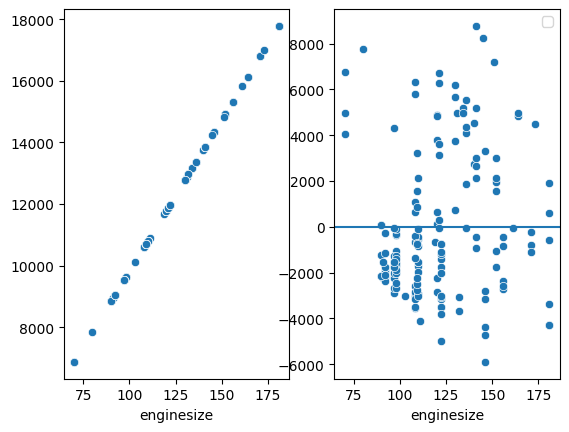

In [166]:
from statsmodels.api import OLS
from statsmodels.api import add_constant

X=df[["enginesize"]].to_pandas()

y=df["price"].to_pandas()
# X=add_constant(X)
model=OLS(y,X).fit()
print(model.summary())
y_pred=model.predict(X)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y_pred,ax=ax1)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y-y_pred,ax=ax2)
plt.axhline(y=0)
plt.legend()


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              1220.
Date:                Sun, 19 May 2024   Prob (F-statistic):                    8.31e-99
Time:                        10:57:06   Log-Likelihood:                         -1561.8
No. Observations:                 165   AIC:                                      3128.
Df Residuals:                     163   BIC:                                      3134.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

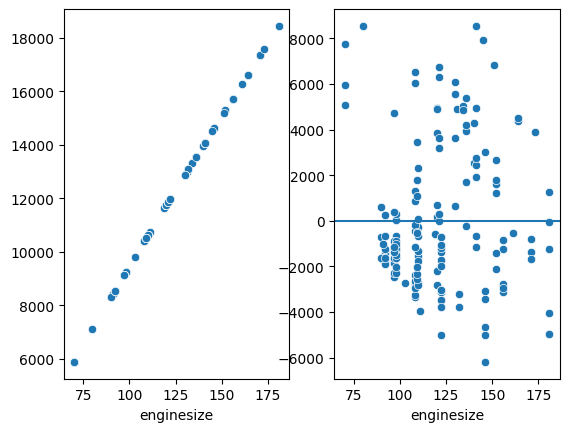

In [167]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
df=df.with_columns((1/df["enginesize"]).alias("invengine"))
X=df[["enginesize","invengine"]].to_pandas()

y=df["price"].to_pandas()
# X=add_constant(X)
model=OLS(y,X).fit()
print(model.summary())
y_pred=model.predict(X)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y_pred,ax=ax1)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y-y_pred,ax=ax2)
plt.axhline(y=0)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              1416.
Date:                Sun, 19 May 2024   Prob (F-statistic):                   6.04e-120
Time:                        10:20:48   Log-Likelihood:                         -1991.4
No. Observations:                 205   AIC:                                      3987.
Df Residuals:                     203   BIC:                                      3994.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

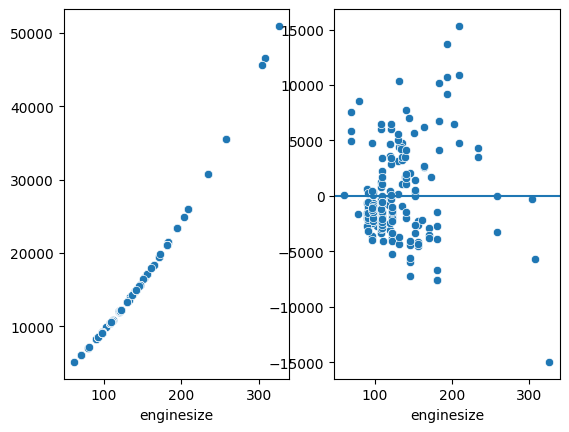

In [92]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
df=df.with_columns((df["enginesize"].pow(2)).alias("engine2"))
X=df[["enginesize","engine2"]].to_pandas()

y=df["price"].to_pandas()
model=OLS(y,X).fit()
print(model.summary())
y_pred=model.predict(X)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y_pred,ax=ax1)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y-y_pred,ax=ax2)
plt.axhline(y=0)


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              1306.
Date:                Sun, 19 May 2024   Prob (F-statistic):                   1.20e-116
Time:                        10:21:08   Log-Likelihood:                         -1999.1
No. Observations:                 205   AIC:                                      4002.
Df Residuals:                     203   BIC:                                      4009.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

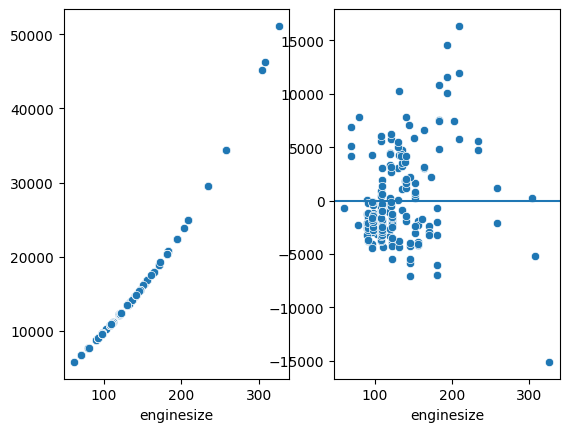

In [93]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
df=df.with_columns((df["enginesize"].pow(3)).alias("engine3"))
X=df[["enginesize","engine3"]].to_pandas()

y=df["price"].to_pandas()
model=OLS(y,X).fit()
print(model.summary())
y_pred=model.predict(X)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y_pred,ax=ax1)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y-y_pred,ax=ax2)
plt.axhline(y=0)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              1529.
Date:                Sun, 19 May 2024   Prob (F-statistic):                   4.00e-123
Time:                        10:21:22   Log-Likelihood:                         -1984.0
No. Observations:                 205   AIC:                                      3972.
Df Residuals:                     203   BIC:                                      3979.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

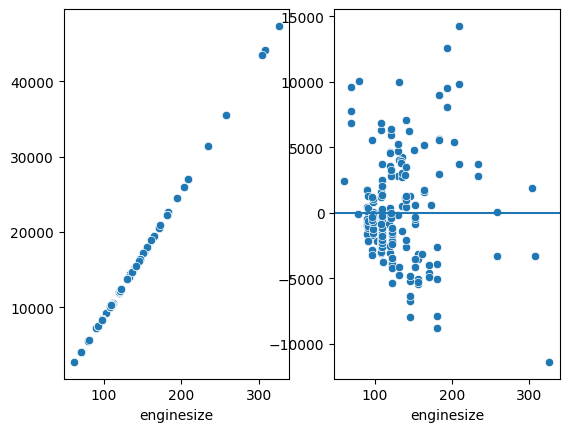

In [94]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
df=df.with_columns((df["enginesize"].log()).alias("enginelog"))
X=df[["enginesize","enginelog"]].to_pandas()

y=df["price"].to_pandas()
model=OLS(y,X).fit()
print(model.summary())
y_pred=model.predict(X)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y_pred,ax=ax1)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y-y_pred,ax=ax2)
plt.axhline(y=0)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              1348.
Date:                Sun, 19 May 2024   Prob (F-statistic):                   6.29e-118
Time:                        10:21:39   Log-Likelihood:                         -1996.1
No. Observations:                 205   AIC:                                      3996.
Df Residuals:                     203   BIC:                                      4003.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

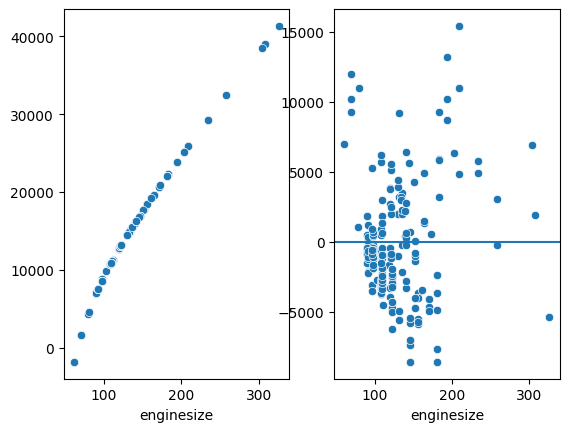

In [95]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
df=df.with_columns((1/df["enginesize"].pow(2)).alias("invengine2"))
X=df[["enginesize","invengine2"]].to_pandas()

y=df["price"].to_pandas()
model=OLS(y,X).fit()
print(model.summary())
y_pred=model.predict(X)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y_pred,ax=ax1)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y-y_pred,ax=ax2)
plt.axhline(y=0)

In [96]:
df

enginesize,price,invengine,engine2,engine3,enginelog,invengine2
i64,f64,f64,i64,i64,f64,f64
130,13495.0,0.007692,16900,2197000,4.867534,0.000059
130,16500.0,0.007692,16900,2197000,4.867534,0.000059
152,16500.0,0.006579,23104,3511808,5.023881,0.000043
109,13950.0,0.009174,11881,1295029,4.691348,0.000084
136,17450.0,0.007353,18496,2515456,4.912655,0.000054
…,…,…,…,…,…,…
141,16845.0,0.007092,19881,2803221,4.94876,0.00005
141,19045.0,0.007092,19881,2803221,4.94876,0.00005
173,21485.0,0.00578,29929,5177717,5.153292,0.000033


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              1416.
Date:                Sun, 19 May 2024   Prob (F-statistic):                   6.04e-120
Time:                        10:48:18   Log-Likelihood:                         -1991.4
No. Observations:                 205   AIC:                                      3987.
Df Residuals:                     203   BIC:                                      3994.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

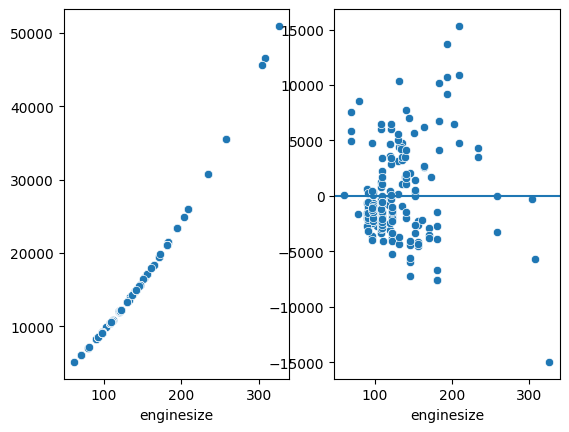

In [137]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
# df=df.with_columns((1/df["enginesize"]).alias("invengine"))
# df=df.with_columns((df["enginesize"].pow(2)).alias("engine2"))
X=df[["enginesize","engine2"]].to_pandas()

y=df["price"].to_pandas()
model=OLS(y,X).fit()
print(model.summary())
y_pred=model.predict(X)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y_pred,ax=ax1)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y-y_pred,ax=ax2)
plt.axhline(y=0)

In [138]:
from sklearn.metrics import r2_score

def get_metrics(X,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X.shape[1]-1)
    return r2,adjusted_r2

(0.7474192837153562, 0.744918484544221)


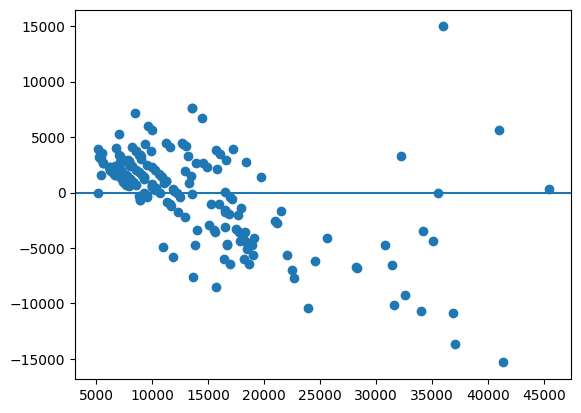

In [139]:
y_pred = model.predict(X)
print(get_metrics(X, y, y_pred))
#Residual Plot
residuals=y_pred-y
plt.scatter(y,residuals)
plt.axhline(y=0)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              973.5
Date:                Sun, 19 May 2024   Prob (F-statistic):                   8.63e-120
Time:                        10:22:05   Log-Likelihood:                         -1988.0
No. Observations:                 205   AIC:                                      3982.
Df Residuals:                     202   BIC:                                      3992.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

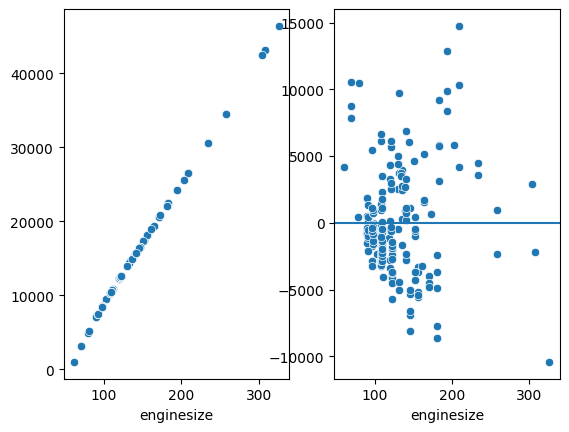

In [98]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
df=df.with_columns((1/df["enginesize"]).alias("invengine"))
df=df.with_columns((df["enginesize"].pow(3)).alias("engine3"))
X=df[["enginesize","invengine","engine3"]].to_pandas()

y=df["price"].to_pandas()
model=OLS(y,X).fit()
print(model.summary())
y_pred=model.predict(X)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y_pred,ax=ax1)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y-y_pred,ax=ax2)
plt.axhline(y=0)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              1021.
Date:                Sun, 19 May 2024   Prob (F-statistic):                   9.49e-122
Time:                        10:22:18   Log-Likelihood:                         -1983.4
No. Observations:                 205   AIC:                                      3973.
Df Residuals:                     202   BIC:                                      3983.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

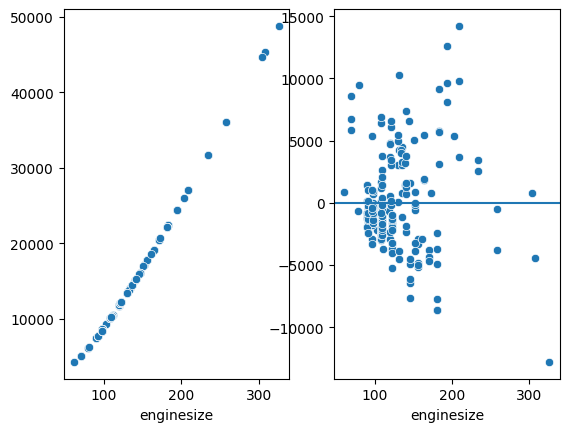

In [99]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
df=df.with_columns((1/df["enginesize"]).alias("invengine"))
df=df.with_columns((df["enginesize"].log()).alias("enginelog"))
X=df[["enginesize","invengine","enginelog"]].to_pandas()

y=df["price"].to_pandas()
model=OLS(y,X).fit()
print(model.summary())
y_pred=model.predict(X)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y_pred,ax=ax1)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y-y_pred,ax=ax2)
plt.axhline(y=0)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              871.0
Date:                Sun, 19 May 2024   Prob (F-statistic):                   1.06e-125
Time:                        10:22:29   Log-Likelihood:                         -1970.5
No. Observations:                 205   AIC:                                      3949.
Df Residuals:                     201   BIC:                                      3962.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

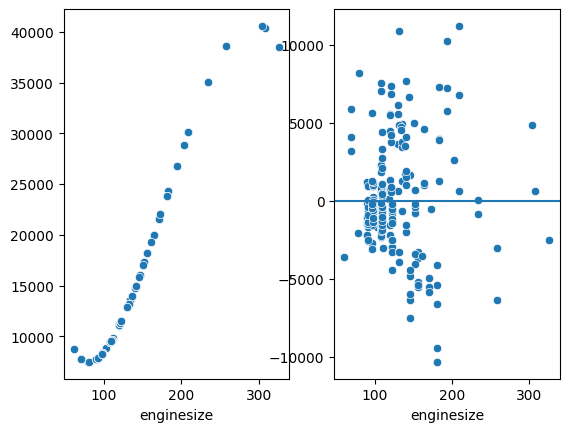

In [100]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
df=df.with_columns((1/df["enginesize"]).alias("invengine"))
df=df.with_columns((df["enginesize"].pow(2)).alias("engine2"))
df=df.with_columns((df["enginesize"].pow(3)).alias("engine3"))
X=df[["enginesize","invengine","engine2","engine3"]].to_pandas()

y=df["price"].to_pandas()
model=OLS(y,X).fit()
print(model.summary())
y_pred=model.predict(X)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y_pred,ax=ax1)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y-y_pred,ax=ax2)
plt.axhline(y=0)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              693.5
Date:                Sun, 19 May 2024   Prob (F-statistic):                   3.28e-124
Time:                        10:38:28   Log-Likelihood:                         -1970.5
No. Observations:                 205   AIC:                                      3951.
Df Residuals:                     200   BIC:                                      3968.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

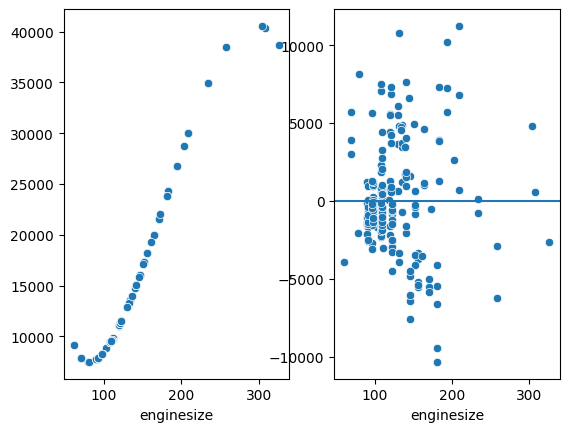

In [117]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
# df=df.with_columns((1/df["enginesize"]).alias("invengine"))
# df=df.with_columns((df["enginesize"].pow(2)).alias("engine2"))
# df=df.with_columns((df["enginesize"].pow(2)).alias("engine2"))
# df=df.with_columns((df["enginesize"].pow(2)).alias("engine2"))
X=df[["enginesize","invengine","engine2","engine3","invengine2"]].to_pandas()

y=df["price"].to_pandas()
model=OLS(y,X).fit()
print(model.summary())
y_pred=model.predict(X)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y_pred,ax=ax1)
sns.scatterplot(x=df["enginesize"].to_pandas(),y=y-y_pred,ax=ax2)
plt.axhline(y=0)

In [110]:
X_trans[:,1]

array([ -8.8032165 ,  -8.8032165 , -19.11705446,   4.1799634 ,
       -11.97274359, -11.97274359, -11.97274359, -11.97274359,
        -9.34911392,  -9.34911392,   4.86606192,   4.86606192,
       -23.1254321 , -23.1254321 , -23.1254321 , -26.18789309,
       -26.18789309, -26.18789309,  42.68703256,  18.1490338 ,
        18.1490338 ,  18.1490338 ,  18.1490338 ,  12.03502022,
        18.1490338 ,  18.1490338 ,  18.1490338 ,  12.03502022,
        -4.19093852, -20.5874264 ,  16.59066634,  16.59066634,
        27.05178586,  16.59066634,  16.59066634,  16.59066634,
        16.59066634,   3.49967771,   3.49967771,   3.49967771,
         3.49967771,   3.49967771,   3.49967771,   2.82525817,
        18.1490338 ,  18.1490338 ,  -2.35251711,  -3.69028566,
        -3.69028566,  83.60694858,  17.36742361,  17.36742361,
        17.36742361,  17.36742361,  17.36742361,  34.71822239,
        34.71822239,  34.71822239,  26.22031336,  -4.19093852,
        -4.19093852,  -4.19093852,  -4.19093852,  -4.19

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.210
Model:                            OLS   Adj. R-squared (uncentered):              0.194
Method:                 Least Squares   F-statistic:                              13.36
Date:                Sun, 19 May 2024   Prob (F-statistic):                    1.13e-09
Time:                        10:37:59   Log-Likelihood:                         -2244.5
No. Observations:                 205   AIC:                                      4497.
Df Residuals:                     201   BIC:                                      4510.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

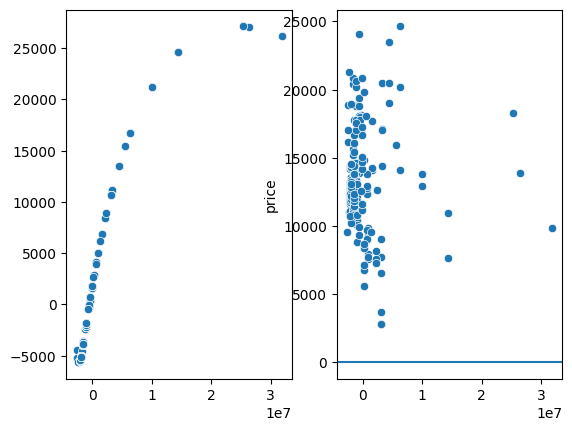

In [116]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X_trans=pca.fit_transform(X)
# X=add_constant(X)
model=OLS(y,X_trans).fit()
print(model.summary())
y_pred=model.predict(X_trans)
fig,[ax1,ax2]=plt.subplots(ncols=2)
sns.scatterplot(x=X_trans[:,0],y=y_pred,ax=ax1)
sns.scatterplot(x=X_trans[:,0],y=y-y_pred,ax=ax2)
plt.axhline(y=0)

In [5]:
logdata=data[num_cols].drop("price")
for col in logdata.columns:
    logdata=logdata.with_columns(logdata[col].log())
    # logdata=logdata.with_columns(logdata[col].pow(2).alias(col+"square"))
logdata=logdata.with_columns(data["price"])

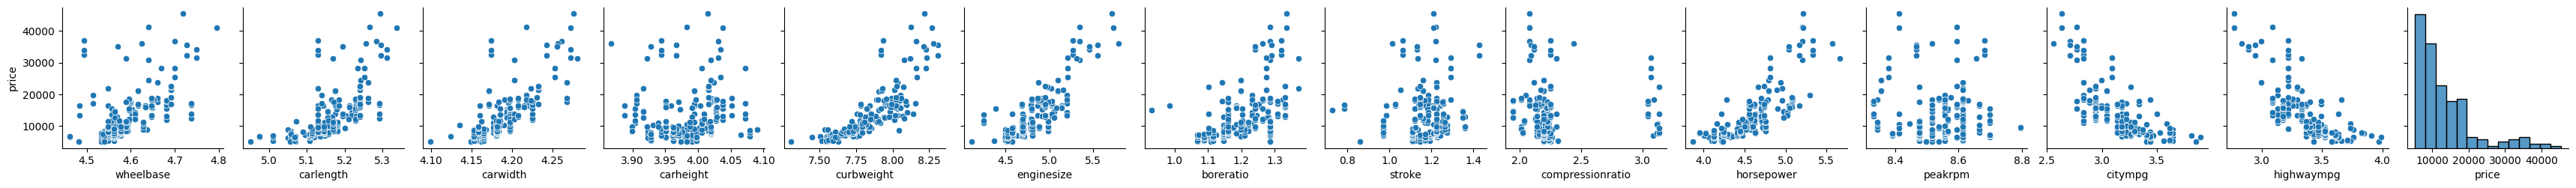

In [677]:
sns.pairplot(logdata.to_pandas(),y_vars=["price"])

In [678]:
logdata=logdata.with_columns(logdata["carlength"].pow(2).alias("carlength"+"square"))
logdata=logdata.with_columns(logdata["carwidth"].pow(2).alias("carwidth"+"square"))
logdata=logdata.with_columns(logdata["horsepower"].pow(2).alias("horsepower"+"square"))
logdata=logdata.with_columns(logdata["citympg"].pow(2).alias("citympg"+"square"))
logdata=logdata.with_columns(logdata["highwaympg"].pow(2).alias("highwaympg"+"square"))
logdata=logdata.with_columns((1/logdata["citympg"]).alias("citympg"+"square"))
logdata=logdata.with_columns((1/logdata["highwaympg"]).alias("highwaympg"+"square"))

<AxesSubplot: xlabel='highwaympg', ylabel='price'>

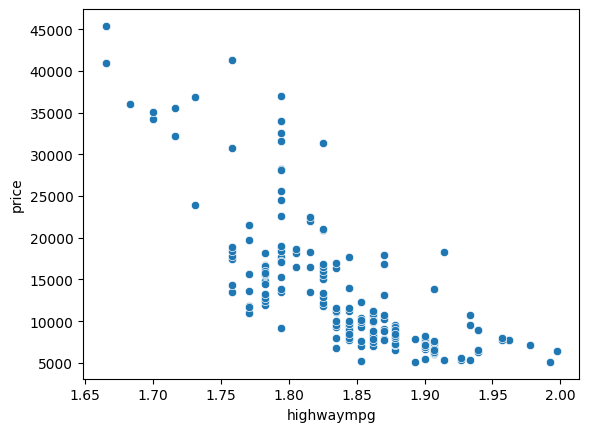

In [679]:
sns.scatterplot(x=logdata["highwaympg"].sqrt(),y=logdata["price"])

In [680]:
from sklearn.metrics import r2_score

def get_metrics(X,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X.shape[1]-1)
    return r2,adjusted_r2

In [681]:
logdata

wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carlengthsquare,carwidthsquare,horsepowersquare,citympgsquare,highwaympgsquare
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
4.484132,5.128715,4.160444,3.88773,7.843064,4.867534,1.244155,0.985817,2.197225,4.70953,8.517193,3.044522,3.295837,13495.0,26.303713,17.309297,22.179675,0.328459,0.303413
4.484132,5.128715,4.160444,3.88773,7.843064,4.867534,1.244155,0.985817,2.197225,4.70953,8.517193,3.044522,3.295837,16500.0,26.303713,17.309297,22.179675,0.328459,0.303413
4.5486,5.142832,4.18205,3.958907,7.945555,5.023881,0.985817,1.244155,2.197225,5.036953,8.517193,2.944439,3.258097,16500.0,26.448726,17.489543,25.370892,0.339623,0.306928
4.603168,5.173887,4.19268,3.994524,7.756623,4.691348,1.160021,1.223775,2.302585,4.624973,8.612503,3.178054,3.401197,13950.0,26.76911,17.578569,21.390374,0.314658,0.294014
4.599152,5.173887,4.195697,3.994524,7.94591,4.912655,1.160021,1.223775,2.079442,4.744932,8.612503,2.890372,3.091042,17450.0,26.76911,17.603874,22.514381,0.345976,0.323515
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4.692265,5.240688,4.232656,4.016383,7.990238,4.94876,1.329724,1.147402,2.251292,4.736198,8.594154,3.135494,3.332205,16845.0,27.464813,17.915378,22.431576,0.318929,0.300102
4.692265,5.240688,4.231204,4.016383,8.022569,4.94876,1.329724,1.147402,2.163323,5.075174,8.575462,2.944439,3.218876,19045.0,27.464813,17.903085,25.757389,0.339623,0.310667
4.692265,5.240688,4.232656,4.016383,8.01036,5.153292,1.275363,1.054312,2.174752,4.89784,8.612503,2.890372,3.135494,21485.0,27.464813,17.915378,23.988835,0.345976,0.318929


In [682]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_variance_inflation_factor(X):
    vif=pd.DataFrame()
    vif["Feature"]= X.columns
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif
vif=calculate_variance_inflation_factor(data[num_cols].drop(["price"]).to_pandas())
vif#["Feature"].tolist()

,Feature,VIF Factor
0,wheelbase,1903.661515
1,carlength,1893.737555
2,carwidth,2350.896000
3,carheight,917.204632
4,curbweight,403.021184
5,enginesize,68.765509
6,boreratio,290.276837
7,stroke,125.834481
8,compressionratio,15.752468
9,horsepower,65.532593


In [683]:
for i in data.drop("price").columns:
    data=data.with_columns(data[i].log())
data[num_cols].head()

wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
4.484132,5.128715,4.160444,3.88773,7.843064,4.867534,1.244155,0.985817,2.197225,4.70953,8.517193,3.044522,3.295837,13495.0
4.484132,5.128715,4.160444,3.88773,7.843064,4.867534,1.244155,0.985817,2.197225,4.70953,8.517193,3.044522,3.295837,16500.0
4.5486,5.142832,4.18205,3.958907,7.945555,5.023881,0.985817,1.244155,2.197225,5.036953,8.517193,2.944439,3.258097,16500.0
4.603168,5.173887,4.19268,3.994524,7.756623,4.691348,1.160021,1.223775,2.302585,4.624973,8.612503,3.178054,3.401197,13950.0
4.599152,5.173887,4.195697,3.994524,7.94591,4.912655,1.160021,1.223775,2.079442,4.744932,8.612503,2.890372,3.091042,17450.0


In [684]:
data=data[["enginesize","price"]]

In [685]:
drop=["carlengthsquare","carwidthsquare","carlength","carwidth","citympg","highwaympg"]

In [686]:
from sklearn.model_selection import train_test_split
X = data.drop(['price']).to_pandas()
y = data['price'].to_pandas()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
from statsmodels.api import OLS
ols=OLS(y_train,X_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              420.5
Date:                Sun, 19 May 2024   Prob (F-statistic):                    2.40e-41
Time:                        01:08:58   Log-Likelihood:                         -1264.0
No. Observations:                 123   AIC:                                      2530.
Df Residuals:                     122   BIC:                                      2533.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
enginesize  2726.5244    132.957     20.507      0.000    2463.322    2989.727
==============================================================================
Omnibus:                       65.052   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.516
Skew:                           2.068   Prob(JB):                     1.29e-43
Kurtosis:                       7.629   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [687]:
y_pred = ols.predict(X_test)
get_metrics(X_test,y_test,y_pred)

(0.13993109661696446, 0.1291802353246766)

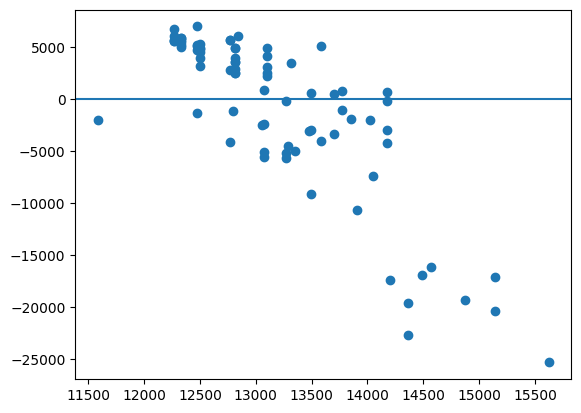

In [688]:
#Residual Plot
residuals=y_pred-y_test
plt.scatter(y_pred,residuals)
plt.axhline(y=0)

In [659]:
a=X.drop(["carlength","curbweight","highwaympgsquare","highwaympg","compressionratio","carwidthsquare","citympgsquare","carheight","wheelbase","carwidth","boreratio","peakrpm","carlengthsquare","stroke","citympg"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(a, y, test_size=0.4)
from statsmodels.api import OLS
ols=OLS(y_train,X_train).fit()
ols.summary()

KeyError: "['carlength', 'curbweight', 'highwaympgsquare', 'highwaympg', 'compressionratio', 'carwidthsquare', 'citympgsquare', 'carheight', 'wheelbase', 'carwidth', 'boreratio', 'peakrpm', 'carlengthsquare', 'stroke', 'citympg'] not found in axis"

(0.6743333227912597, 0.6618076813601543)


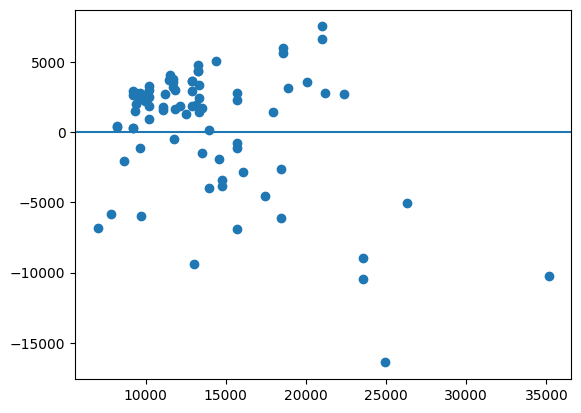

In [ ]:
y_pred = ols.predict(X_test)
print(get_metrics(X_test,y_test,y_pred))
#Residual Plot
residuals=y_pred-y_test
plt.scatter(y_pred,residuals)
plt.axhline(y=0)